# **Predictions for China**


In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the dataset in Google Colab
from google.colab import files
uploaded = files.upload()

Saving China Electricity Consumption and Losses - Sheet1.csv to China Electricity Consumption and Losses - Sheet1 (1).csv


**Measuring Correlation between different features present**

   Year Provinces  Total Number of consumers (Millions)  \
0  2015     Anhui                                 23.00   
1  2016     Anhui                                   NaN   
2  2017     Anhui                                   NaN   
3  2018     Anhui                                 24.25   
4  2019     Anhui                                 25.25   

   Total Electricity Sales (MU)  Total Revenue (Rs. Crore)  AT&C Losses (%)  \
0                       2500.00                      125.0             6.00   
1                       2500.00                        NaN             6.00   
2                       2500.25                        NaN             6.25   
3                       2600.25                      130.5             7.25   
4                       2600.25                      140.5             8.25   

   Average power purchase cost (Rs./kWh)  Average Cost of Supply (Rs./kWh)  \
0                                  0.480                             0.580   
1             

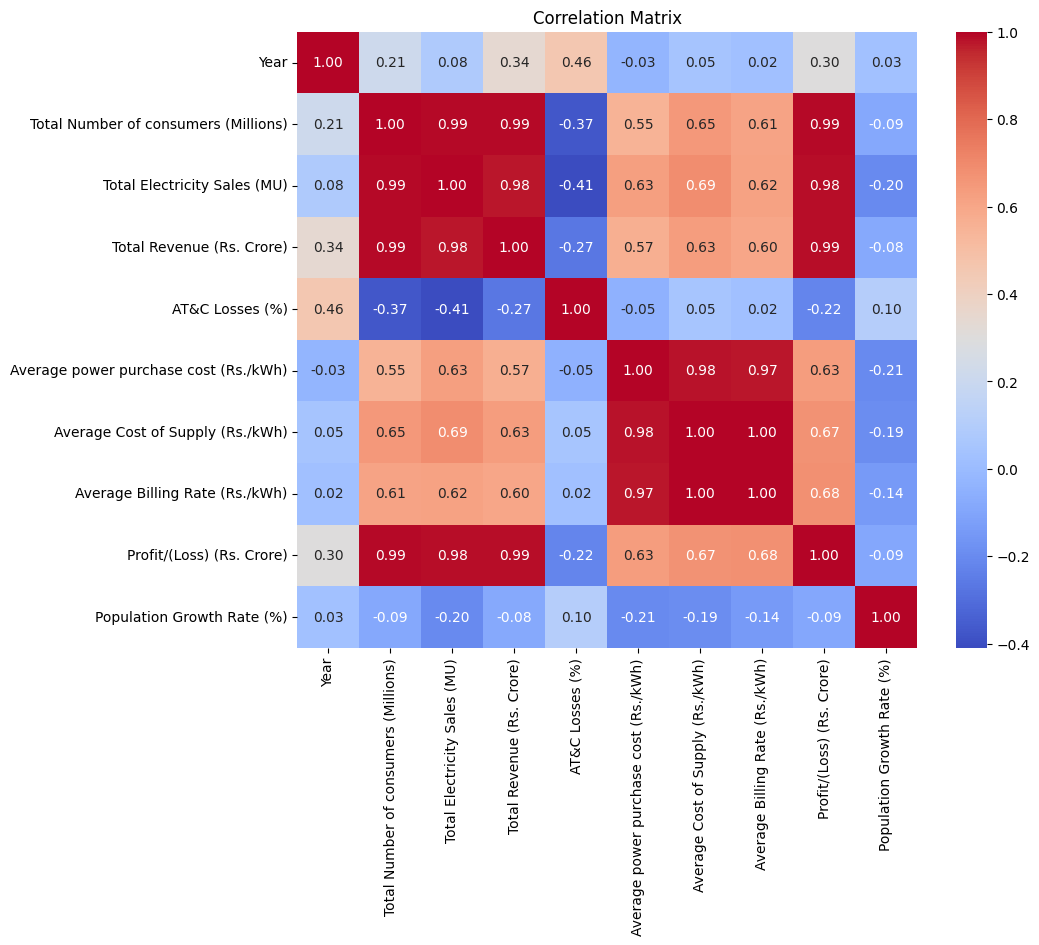

In [ ]:
# Reading the dataset
import io
df = pd.read_csv(io.BytesIO(uploaded['China Electricity Consumption and Losses - Sheet1 (1).csv']))

# Displaying the first few rows of the dataset
print(df.head())

# Descriptive statistics
print(df.describe())

# Excluding non-numeric columns for correlation analysis
numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()
correlation_matrix = df[numeric_columns].corr()

# Plotting correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

**Data Preprocessing and Encoding**

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Label encode the 'Provinces' column
label_encoder = LabelEncoder()
df['Provinces'] = label_encoder.fit_transform(df['Provinces'])
df.fillna(df.mean(), inplace=True)
# Split features and target variable
X = df.drop(['Total Electricity Sales (MU)'], axis=1)  # Features
y = df['Total Electricity Sales (MU)']  # Target variable

**Train-Test Split**

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Testing Different Models for Measuring Effective Future Consumption Forecasting**


1.   Linear Regression
2.   SVM
3.   Random Forest Regressor
4.   KNN
5.   ANN

In [ ]:
def train_and_evaluate_model(model, X_train, y_train, X_test, y_test):
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    predictions = model.predict(X_test)

    # Calculate evaluation metrics
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)

    return mae, mse, r2

# Initialize models
linear_reg = LinearRegression()
random_forest = RandomForestRegressor(random_state=42)
svr = SVR()
knn = KNeighborsRegressor()
ann = MLPRegressor(random_state=42)

models = [linear_reg, random_forest, svr, knn, ann]
model_names = ['Linear Regression', 'Random Forest', 'SVR', 'KNN', 'ANN']

# Train and evaluate models
results = []
for model, name in zip(models, model_names):
    mae, mse, r2 = train_and_evaluate_model(model, X_train, y_train, X_test, y_test)
    results.append({'Model': name, 'MAE': mae, 'MSE': mse, 'R-Squared': r2})

results_df = pd.DataFrame(results)
print(results_df)

               Model         MAE            MSE  R-Squared
0  Linear Regression  258.630257  110900.911181   0.683410
1      Random Forest  179.129252   46150.461034   0.868254
2                SVR  443.300474  350332.385944  -0.000098
3                KNN  256.154952  108142.207693   0.691285
4                ANN  428.847127  307941.259695   0.120917


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


**Training and Evaluating Each Model with Cross-Validation**

In [ ]:
# Train and evaluate models with cross-validation
results_cv = []
for model, name in zip(models, model_names):
    cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
    cv_mse = -cv_scores.mean()  # Take the negative mean to get MSE
    cv_r2_scores = cross_val_score(model, X, y, cv=5, scoring='r2')
    cv_r2 = cv_r2_scores.mean()
    results_cv.append({'Model': name, 'Cross-validated MSE': cv_mse, 'Cross-validated R-Squared': cv_r2})

results_cv_df = pd.DataFrame(results_cv)
print(results_cv_df)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

               Model  Cross-validated MSE  Cross-validated R-Squared
0  Linear Regression        112704.190825                   0.461681
1      Random Forest         98734.654275                   0.519895
2                SVR        323594.938023                  -0.521988
3                KNN        123653.410990                   0.418234
4                ANN        334417.720205                  -0.580295


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


**Loss Prediction using different Models**

In [ ]:
# Define features and target variables for losses prediction
X_losses = df.drop(['AT&C Losses (%)'], axis=1)  # Features
y_losses = df['AT&C Losses (%)']  # Target variable

# Split the dataset into training and testing sets for losses prediction
X_train_losses, X_test_losses, y_train_losses, y_test_losses = train_test_split(X_losses, y_losses, test_size=0.2, random_state=42)

# Initialize models for losses prediction
models_losses = [linear_reg, random_forest, svr, knn, ann]
model_names_losses = ['Linear Regression', 'Random Forest', 'SVR', 'KNN', 'ANN']

# Train and evaluate models for losses prediction
results_losses = []
for model, name in zip(models_losses, model_names_losses):
    mae_losses, mse_losses, r2_losses = train_and_evaluate_model(model, X_train_losses, y_train_losses, X_test_losses, y_test_losses)
    results_losses.append({'Model': name, 'MAE': mae_losses, 'MSE': mse_losses, 'R-Squared': r2_losses})

results_losses_df = pd.DataFrame(results_losses)
print(results_losses_df)

               Model         MAE           MSE    R-Squared
0  Linear Regression    1.424600      2.684401     0.174573
1      Random Forest    0.637402      0.638397     0.803699
2                SVR    1.220935      2.749809     0.154461
3                KNN    1.196010      2.237801     0.311898
4                ANN  113.463711  12972.350164 -3987.870737


**Plot for Losses Prediction with each Model**

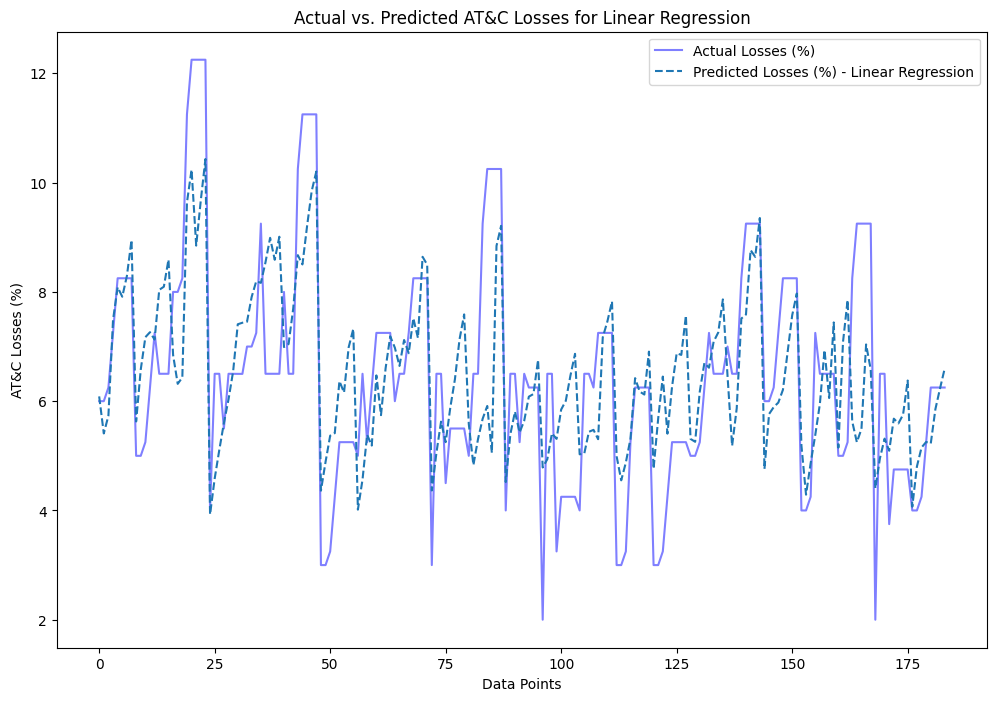

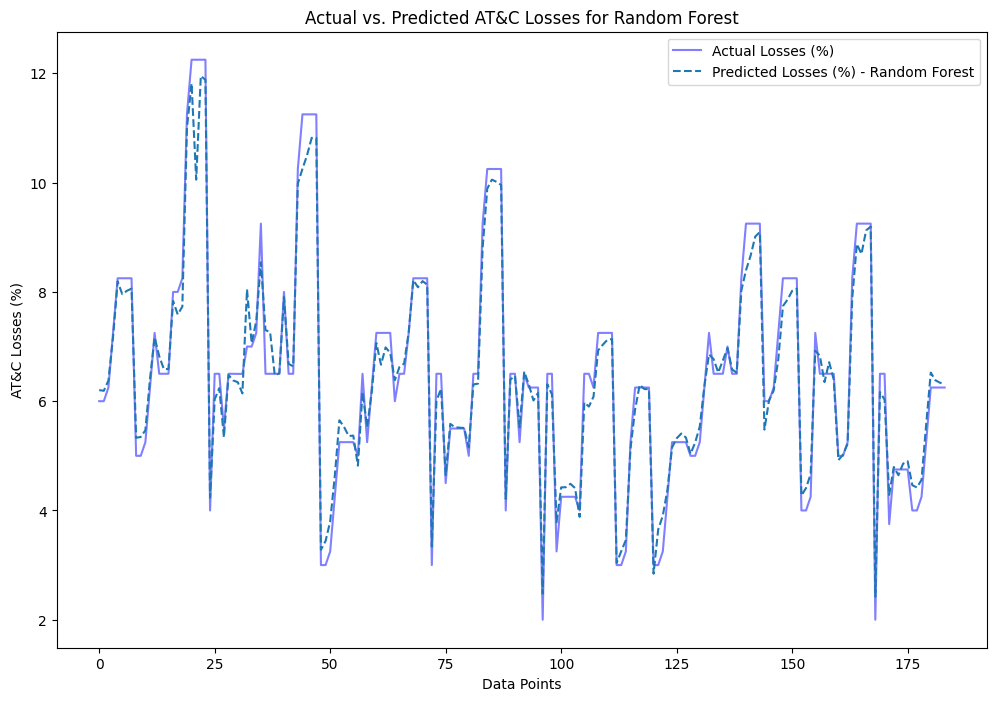

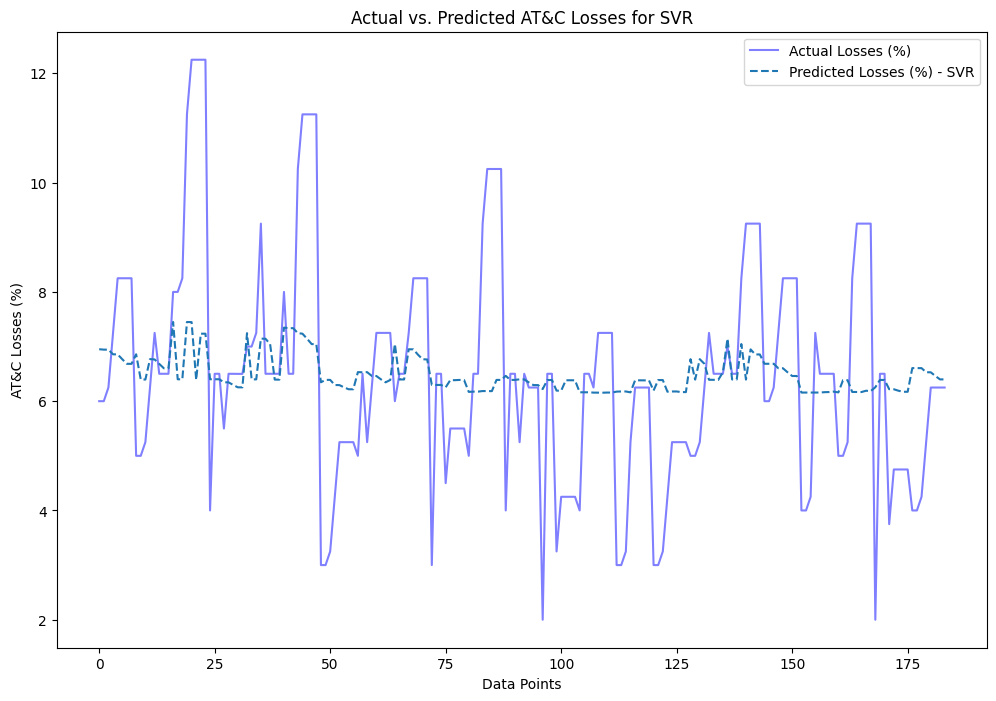

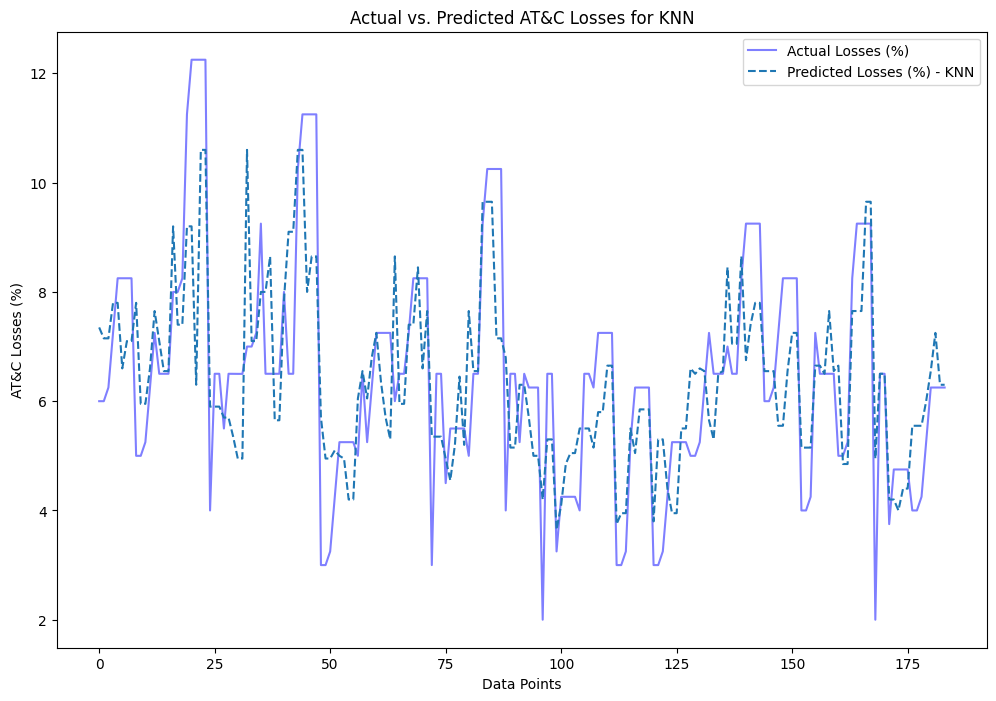

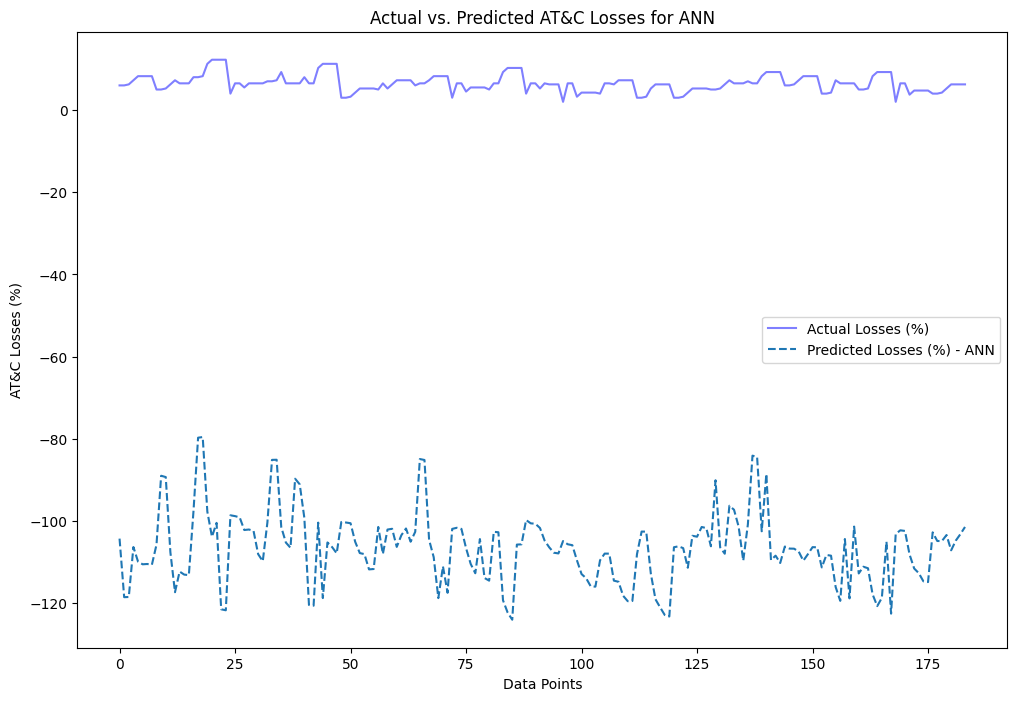

<Figure size 1200x800 with 0 Axes>

In [ ]:
# Initialize models for losses prediction
models_losses = [LinearRegression(), RandomForestRegressor(random_state=42), SVR(), KNeighborsRegressor(), MLPRegressor(random_state=42)]
model_names_losses = ['Linear Regression', 'Random Forest', 'SVR', 'KNN', 'ANN']

# Plot actual vs. predicted losses for each model separately
plt.figure(figsize=(12, 8))
for model, name in zip(models_losses, model_names_losses):
    # Train the model on the entire dataset
    model.fit(X_losses, y_losses)

    # Make predictions for the entire dataset
    losses_predictions = model.predict(X_losses)

    # Plot actual vs. predicted losses
    plt.plot(df.index, y_losses, label='Actual Losses (%)', color='blue', alpha=0.5)
    plt.plot(df.index, losses_predictions, label='Predicted Losses (%) - ' + name, linestyle='--')
    plt.title('Actual vs. Predicted AT&C Losses for ' + name)
    plt.xlabel('Data Points')
    plt.ylabel('AT&C Losses (%)')
    plt.legend()

    # Clear the current plot for the next model
    plt.figure(figsize=(12, 8))

plt.show()